In [139]:
import pyautogui as ag
import matplotlib.pyplot as plt
import numpy as np
from pynput.keyboard import Key, Controller
keyboard = Controller()
import time
%matplotlib inline

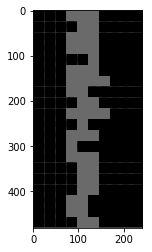

In [125]:
pox=700
poy=196
pw=96
ph=96
hox=324
hoy=196
hw=96
hh=96
box=430
boy=196
bw=242
bh=482
im=np.array(ag.screenshot(region=(box,boy,bw,bh)))
plt.imshow(im)

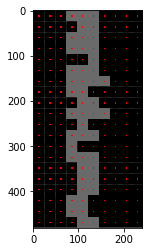

In [134]:
im2=im.copy()
bsqo=12
bgs=24
for i in range(20):
    for j in range(10):
        y=bsqo+bgs*i
        x=bsqo+bgs*j
        im2[y:y+3,x:x+3]=np.array([255,0,0])
plt.imshow(im2)

In [152]:

sqo=12
gs=24
'''S,L,J,I,O,Z,T'''
pc=dict()
thresh=30
pc['S']=((2,0),(2,1),(1,1),(1,2))
pc['Z']=((2,2),(2,1),(1,1),(1,0))
pc['O']=((1,1),(1,2),(2,1),(2,2))
pc['I']=((1,1),(1,2),(1,0),(1,3))
pc['J']=((1,0),(2,0),(2,1),(2,2))
pc['L']=((1,2),(2,0),(2,1),(2,2))
pc['T']=((1,1),(2,0),(2,1),(2,2))
hvals=[-4.500158825082766,
       3.4181268101392694,
       -3.2178882868487753,
       -9.348695305445199,
       -7.899265427351652,
       -3.3855972247263626]
def getnextpiece():
    im=np.array(ag.screenshot(region=(pox,poy,pw,ph)))
    piece=None
    for k,v in pc.items():
        check=True
        for y,x in v:
            if np.sum(im[sqo+gs*y,sqo+gs*x])<thresh:
                check=False
        if check:
            piece=k
            break
    return piece
def getheldpiece():
    im=np.array(ag.screenshot(region=(hox,hoy,hw,hh)))
    piece=None
    for k,v in pc.items():
        check=True
        for y,x in v:
            if np.sum(im[sqo+gs*y,sqo+gs*x])<thresh:
                check=False
        if check:
            piece=k
            break
    return piece
def getboard():
    im=np.array(ag.screenshot(region=(box,boy,bw,bh)))
    board=np.zeros((20,10))
    for i in range(1,20):
        for j in range(10):
            y=bsqo+bgs*i
            x=bsqo+bgs*j
            if np.sum(im[y,x])>thresh:
                board[i,j]=1
    #plt.imshow(board)
    return board
def press(key):
    keyboard.press(key)
    keyboard.release(key)
def heuristic(board,landing_height,piece_height):
    

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

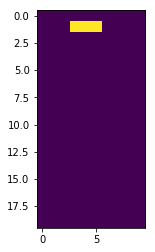

In [153]:
getboard()

In [158]:
start_delay=4.25
delay=0.1
def main():
    held=None
    cur=None
    time.sleep(start_delay)
    cur=getnextpiece()
    #time.sleep(delay)
    press('c')
    time.sleep(delay)
    held=getheldpiece()
    nex=getnextpiece()
    #press(Key.space)
    #getboard()
    print(held,cur,nex)
    

In [159]:
main()

J I O
